## 1. Data Acquisition and Preparation
* The Kaggle dataset Car Price Prediction has been downloaded.
* The data is successfully loaded into a pandas DataFrame.
* Missing values are handled appropriately.
* Categorical features are encoded.
* The dataset is split into training and testing sets.

##  Data Acquisition and Preparation

In [22]:
from sklearn.linear_model import LinearRegression  #used for regression and class
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [23]:
path = "CarPrice_Assignment.csv"
df = pd.read_csv(path)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [25]:
np.sum(df.duplicated())

np.int64(0)

In [26]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [27]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [28]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)

In [29]:
df["CarBrand"] = df["CarName"].str.split().str[0].str.lower()
df = df.drop("CarName", axis=1)
X = df.loc[:, df.columns != "price"]

In [30]:
df_encoded

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


## 2. Exploratory Data Analysis and Feature Engineering

* Key features and their relationships with the target variable, Selling_Price, are visualized using scatter plots and heatmaps.
* Outliers are identified and handled.
* New features are engineered from existing ones.
* Relevant plots, such as histograms and box plots, are generated for key features to understand their distribution.


##  Exploratory Data Analysis and Feature Engineering

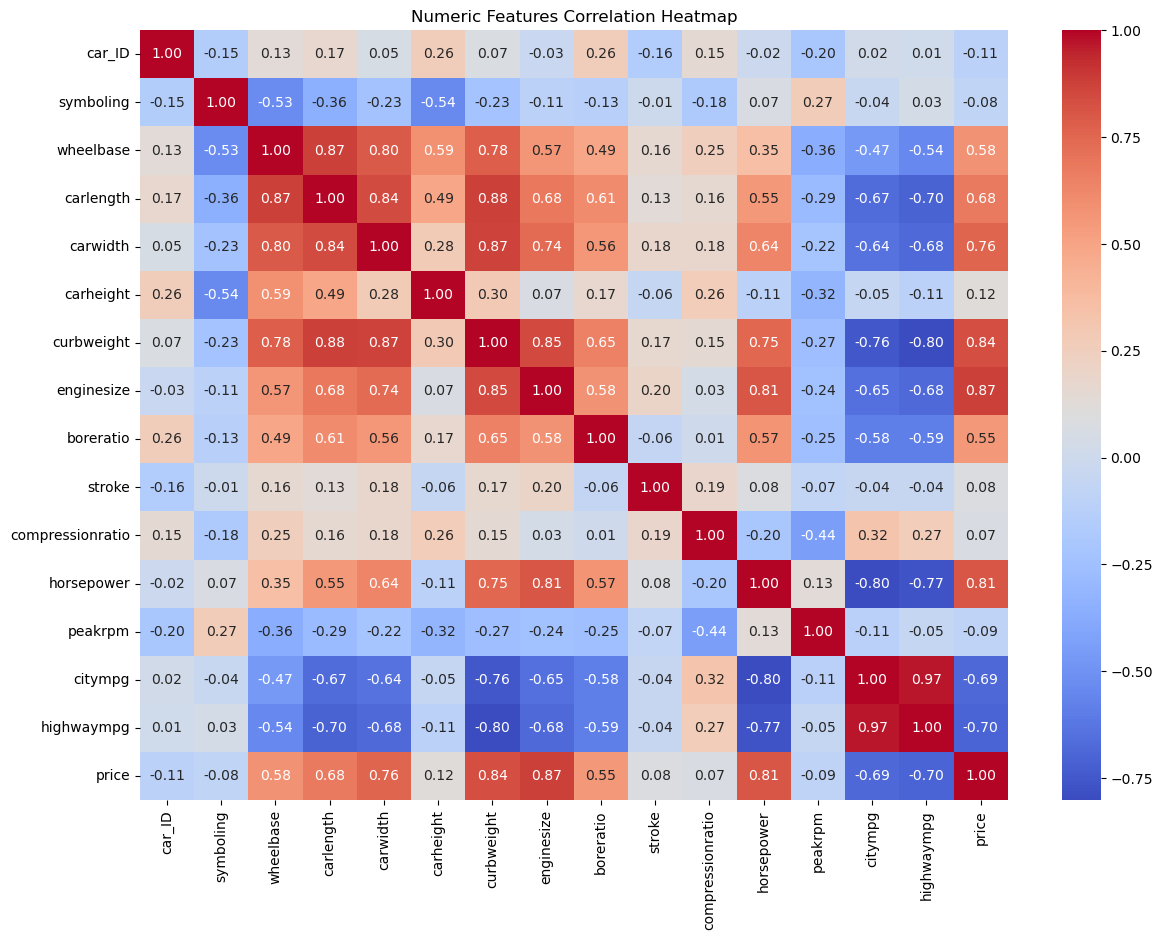

In [31]:
num_cols = df.select_dtypes(include=[np.number]).columns.to_list()
plt.figure(figsize=(14, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Numeric Features Correlation Heatmap")
plt.show()


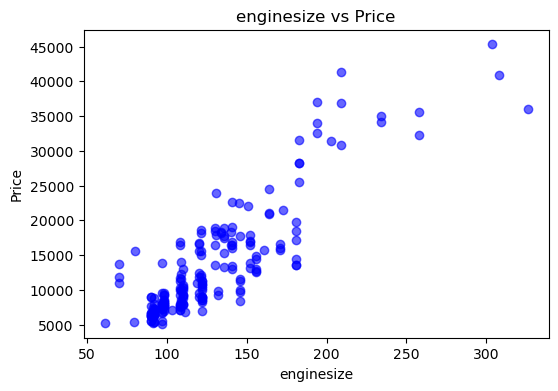

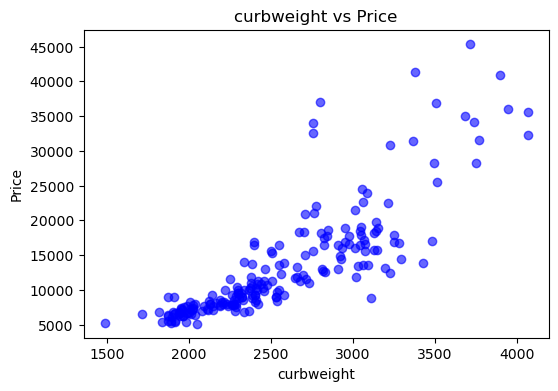

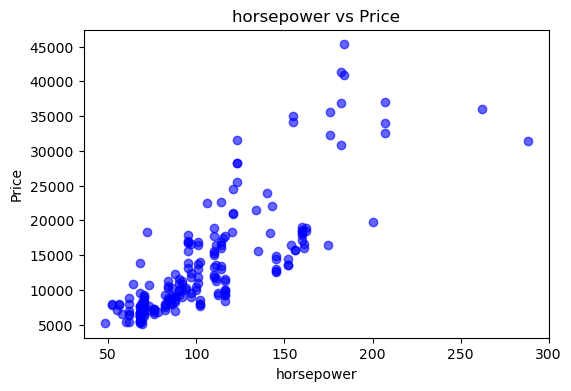

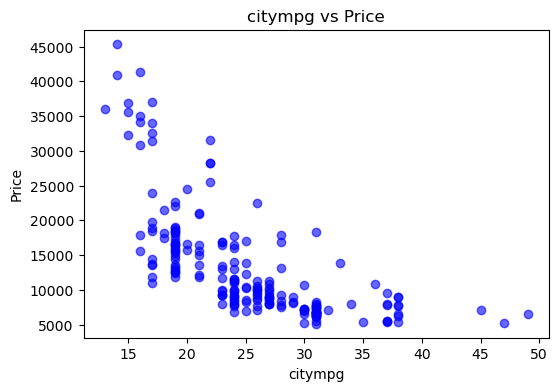

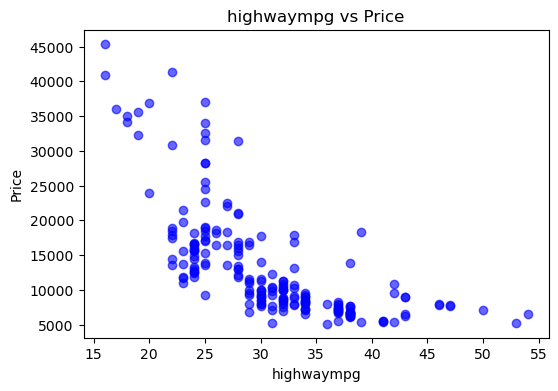

In [32]:
features = ['enginesize', 'curbweight', 'horsepower', 'citympg', 'highwaympg']

for col in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df["price"], alpha=0.6, color="blue")
    plt.title(f"{col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()


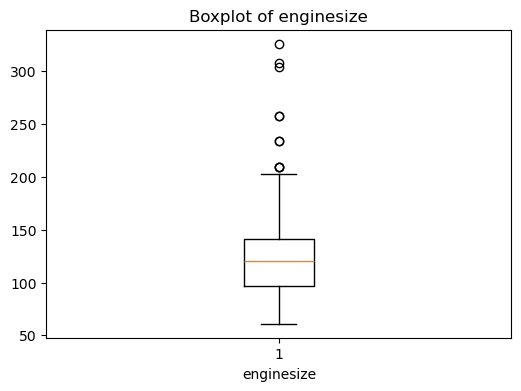

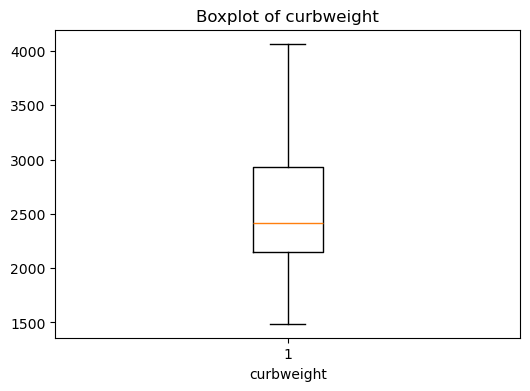

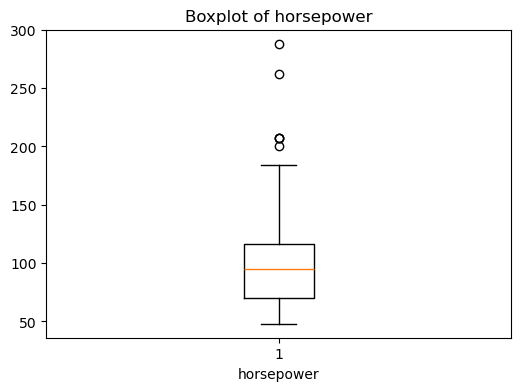

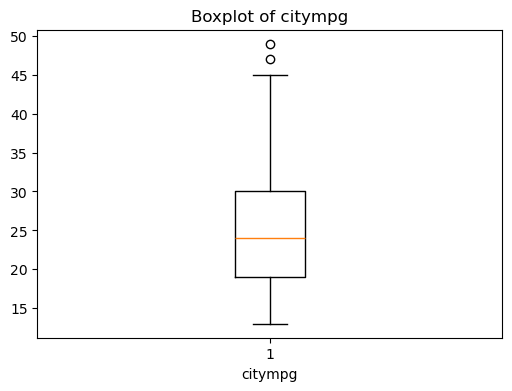

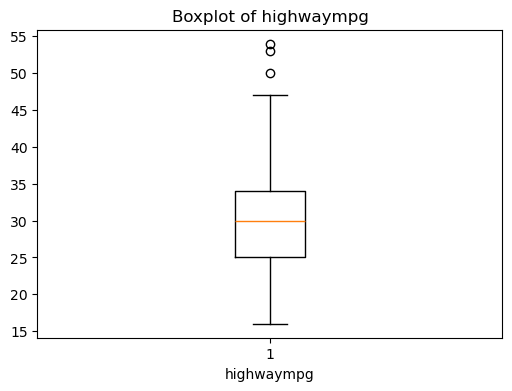

In [33]:
for col in features:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
df = df[df["price"].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)]


In [34]:
import numpy as np

df["power_to_weight"] = np.divide(df["horsepower"], df["curbweight"])
df["car_volume"] = np.multiply(df["carlength"], np.multiply(df["carwidth"], df["carheight"]))


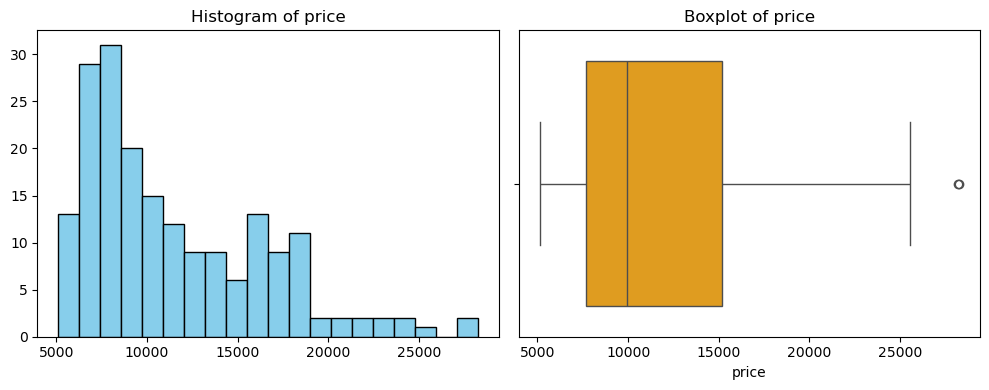

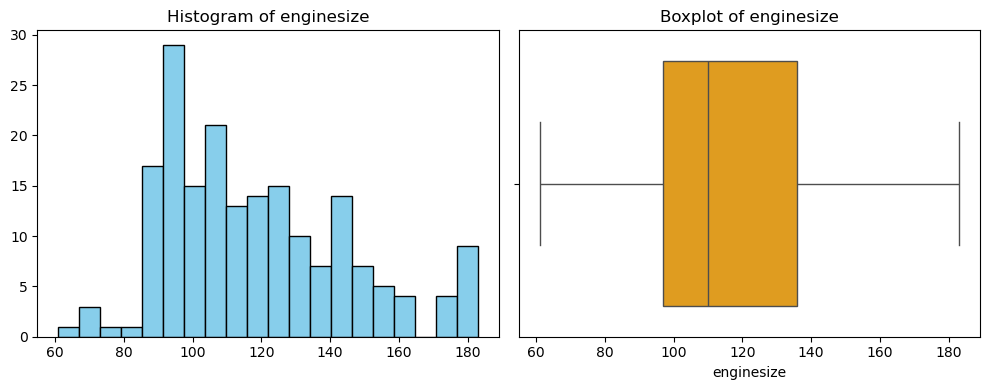

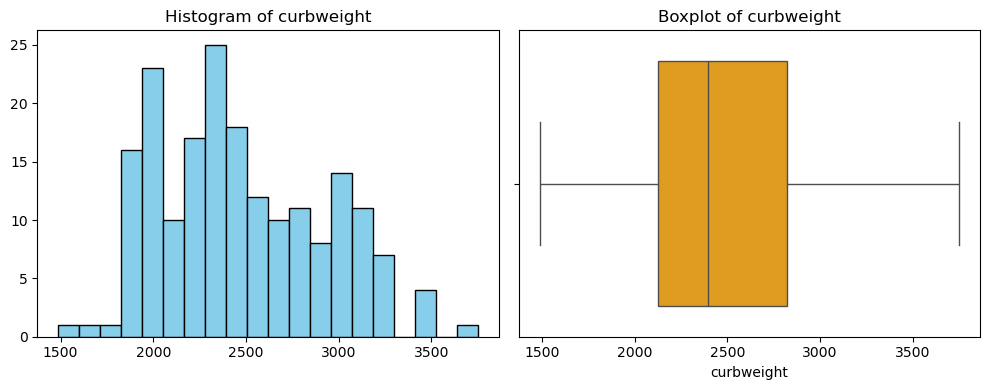

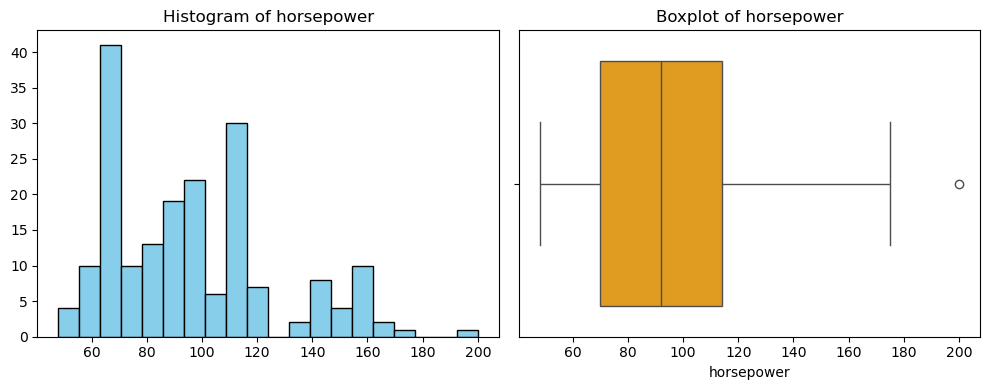

In [35]:
for col in ["price", "enginesize", "curbweight", "horsepower"]:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].hist(df[col], bins=20, color="skyblue", edgecolor="black")
    axes[0].set_title(f"Histogram of {col}")

    sns.boxplot(x=df[col], color="orange", ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


## 3. Model Development and Comparison
* A linear regression model is trained as a baseline.
* A regularized regression model (e.g., Ridge or Lasso) is trained to address potential overfitting.
* A tree-based regression model (e.g., Random Forest or Gradient Boosting) is trained.
* Each model's performance is evaluated using metrics like Root Mean Squared Error (RMSE) and R2 score on the test set.

##  Model Development and Comparison

In [36]:
X_encoded = pd.get_dummies(X, drop_first=True, dtype=int)
X = X_encoded.copy()


In [37]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   enginesize             205 non-null    int64  
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower             205 non-null    int64  
 12  peakrpm                205 non-null    int64  
 13  citympg                205 non-null    int64  
 14  highwaympg             205 non-null    int64  
 15  fuelty

In [39]:
# Target variable
y = df["price"]

# Features (everything except price)
X = df.drop(columns=["price"])

# Now do the split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)


In [41]:
print(X.dtypes.value_counts())


object     10
float64     9
int64       8
Name: count, dtype: int64


In [42]:
# Target
y = df["price"]

# Features
X = df.drop(columns=["price"])

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True, dtype=int)

# Confirm all numeric now
print(X.dtypes.value_counts())


int64      57
float64     9
Name: count, dtype: int64


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Target variable
y = df["price"]

# Features (drop target)
X = df.drop(columns=["price"])

# Encode categorical columns
X = pd.get_dummies(X, drop_first=True, dtype=int)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)


In [49]:
#see only int64 and float64.
print(X_train.dtypes.value_counts())


int64      57
float64     9
Name: count, dtype: int64


In [50]:
# Ridge Regression (regularized)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [51]:
# Lasso Regression (regularized)
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.720e+07, tolerance: 3.867e+05
  model = cd_fast.enet_coordinate_descent(


In [53]:
# Random Forest (tree-based)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [54]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "RMSE": rmse, "R2 Score": r2}

results = []
results.append(evaluate_model(y_test, y_pred_lin, "Linear Regression"))
results.append(evaluate_model(y_test, y_pred_ridge, "Ridge Regression"))
results.append(evaluate_model(y_test, y_pred_lasso, "Lasso Regression"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))

results_df = pd.DataFrame(results)
print(results_df)

               Model         RMSE  R2 Score
0  Linear Regression  2080.399110  0.742523
1   Ridge Regression  1376.202798  0.887330
2   Lasso Regression  1883.215154  0.789019
3      Random Forest  1119.197880  0.925483


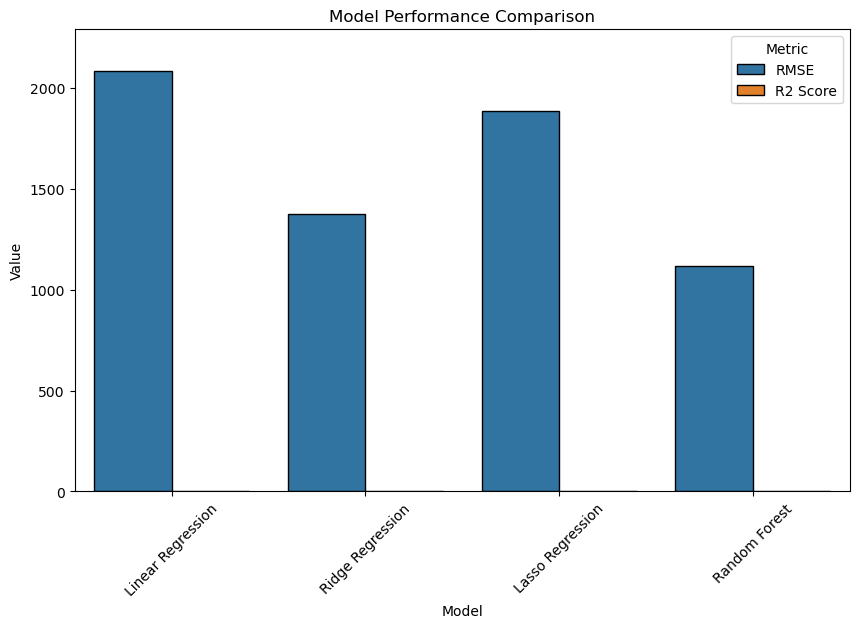

In [56]:
metrics = results_df.melt(id_vars="Model", value_vars=["RMSE", "R2 Score"],
                          var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Value", hue="Metric", data=metrics, edgecolor="black")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1.1 * metrics["Value"].max())
plt.show()


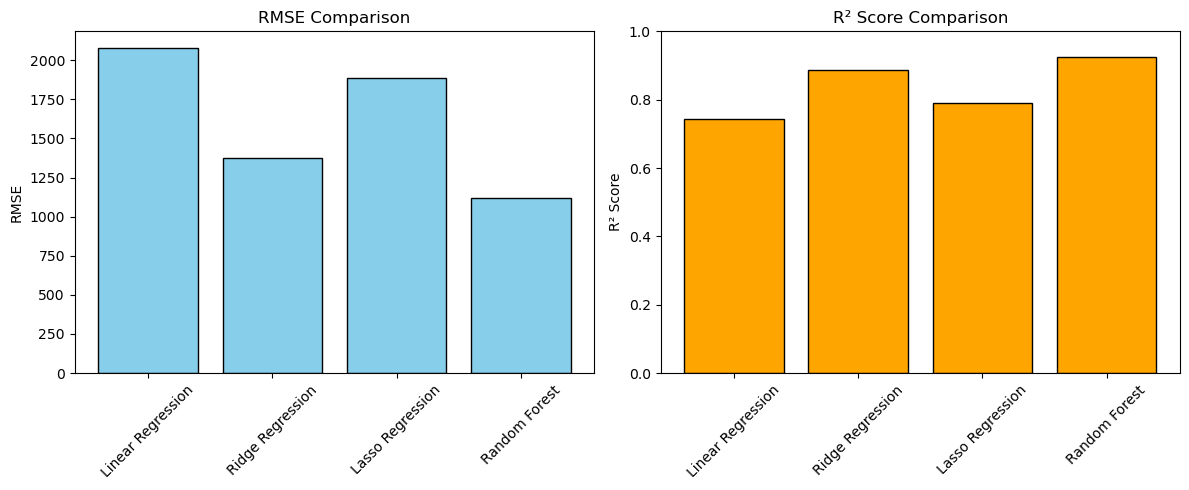

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# RMSE plot
axes[0].bar(results_df["Model"], results_df["RMSE"], color="skyblue", edgecolor="black")
axes[0].set_title("RMSE Comparison")
axes[0].set_ylabel("RMSE")
axes[0].tick_params(axis="x", rotation=45)

# R² plot
axes[1].bar(results_df["Model"], results_df["R2 Score"], color="orange", edgecolor="black")
axes[1].set_title("R² Score Comparison")
axes[1].set_ylabel("R² Score")
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()
